In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import time

## Verinin Yüklenmesi

In [2]:
start = time.time()

In [3]:
train_data = pd.read_csv("/content/cure_the_princess_train.csv")
val_data = pd.read_csv("/content/cure_the_princess_validation.csv")
test_data = pd.read_csv("/content/cure_the_princess_test.csv")

In [4]:
train_data["Cured"].value_counts()

0    635
1    617
Name: Cured, dtype: int64

## Verilerin Bölünmesi (inputs-labels şeklinde)

In [5]:
input_train = train_data[train_data.columns[:-1]]
labels_train = train_data[train_data.columns[-1]]

input_val = val_data[val_data.columns[:-1]]
labels_val = val_data[val_data.columns[-1]]

input_test = test_data[test_data.columns[:-1]]
labels_test = test_data[test_data.columns[-1]]

In [6]:
input_train = torch.tensor(input_train.values, dtype=torch.float32)
labels_train = torch.tensor(labels_train.values, dtype=torch.float32)
input_val = torch.tensor(input_val.values, dtype=torch.float32)
labels_val = torch.tensor(labels_val.values, dtype=torch.float32)
input_test = torch.tensor(input_test.values, dtype=torch.float32)
labels_test = torch.tensor(labels_test.values, dtype=torch.float32)

## Verilerin DataLoader Formatına Getirilmesi

In [7]:
torch.manual_seed(160401003)

In [8]:
from torch.utils.data import TensorDataset, DataLoader

In [9]:
train_dataset = DataLoader(TensorDataset(input_train, labels_train), batch_size=16, shuffle=True)

val_dataset = DataLoader(TensorDataset(input_val, labels_val), batch_size=16, shuffle=True)

test_dataset = DataLoader(TensorDataset(input_test, labels_test), batch_size=16, shuffle=True)

## Yapay Sinir Ağının Oluşturulması

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, num_input, num_neurons1, num_neurons2):
        super(NeuralNet, self).__init__()
        self.hidden_layer_1 = nn.Linear(num_input, num_neurons1) 
        self.hidden_layer_2 = nn.Linear(num_neurons1, num_neurons2)
        self.output_layer = nn.Linear(num_neurons2, 1) 

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden_layer_1(x))

        x = self.relu(self.hidden_layer_2(x))

        x = self.sigmoid(self.output_layer(x))

        return x

## Modelin Eğitilmesi

In [11]:
import matplotlib.pyplot as plt

Epoch 1 train loss: 0.5552428036550933, validation loss: 0.3742512106895447
Epoch 2 train loss: 0.37036441247674484, validation loss: 0.3352923460304737
Epoch 3 train loss: 0.29825119155494473, validation loss: 0.2103345587849617
Epoch 4 train loss: 0.25148538405759424, validation loss: 0.43087432608008386
Epoch 5 train loss: 0.22069840694341478, validation loss: 0.18660524766892195
Epoch 6 train loss: 0.2034378568582897, validation loss: 0.269787035509944
Epoch 7 train loss: 0.17971688263778446, validation loss: 0.6911473169922828
Epoch 8 train loss: 0.1656416064199013, validation loss: 0.15291846599429845
Epoch 9 train loss: 0.14638618360969086, validation loss: 0.34173531644046307
Epoch 10 train loss: 0.14865429206645187, validation loss: 0.18956794389523565
Epoch 11 train loss: 0.14668562168939203, validation loss: 0.14041167767718435
Epoch 12 train loss: 0.1136081189365138, validation loss: 0.15733758490532637
Epoch 13 train loss: 0.12087481961691682, validation loss: 0.1418759573

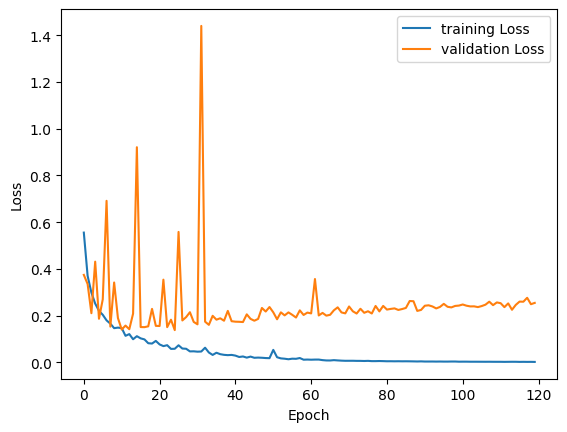

Eğitim bitti.


In [12]:
model = NeuralNet(13,100,50)
lr=0.02
num_epochs=120

loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

loss_train = []
loss_val = []

for epoch in range(num_epochs):

  train_loss = 0.0
  val_loss = 0.0
  
  for inputs, labels in train_dataset:
      optimizer.zero_grad()

      outputs = model(inputs)
      labels = labels.unsqueeze(1)
      loss = loss_func(outputs, labels)
      loss.backward()
      optimizer.step()

      
      train_loss += loss.item()
    

  model.eval()
  with torch.no_grad():
    for inputs, targets in val_dataset:
      outputs = model(inputs)
      targets = targets.reshape(-1,1)
      loss = loss_func(outputs, targets)

      val_loss += loss.item()

  model.train()

  train_loss /= len(train_dataset)
  val_loss /= len(val_dataset)

  print(f"Epoch {epoch+1} train loss: {train_loss}, validation loss: {val_loss}")

  loss_train.append(train_loss)
  loss_val.append(val_loss)

plt.plot(loss_train, label='training Loss')
plt.plot(loss_val, label='validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
        

print('Eğitim bitti.')

In [13]:
end = time.time()
print(end-start)

21.935478448867798
